# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Свойства оценок

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import scipy.stats as sps
import seaborn as sns
sns.set(font_scale=1.5)

###   1. Несмещенность оценок

Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим оценки $X_{(n)}, \frac{n+1}{n}X_{(n)}, 2\overline{X}$ параметра $\theta$. 
Как известно из теории, оценки $\frac{n+1}{n}X_{(n)}, 2\overline{X}$ являются *несмещенными*. В то время как, оценка  $X_{(n)}$ таким ствойством не обладает. Давайте визуализируем данные свойства оценок.

Реализуем выборку из равномерного распределения размером `sample_size`=100.

In [2]:
sample_size = 100
X = sps.uniform.rvs(size=sample_size)

In [3]:
np.max(X)

0.9888707125448506

В этом случае мы сгенерировали выборку из распределения $U[0, 1]$.


Реализуйте три функции, каждая из которых на вход берет несколько выборок, а на выход выдает массив оценок  
(первая функция - $X_{(n)}$, вторая функция - $\frac{n+1}{n}X_{(n)}$, третья функция - $2\overline{X}$)  для каждой выборки.

In [7]:
def estimate_X_n(X):
    """
    Принимает на вход массив размером (n_samples, sample_size), выдает массив оценок размера (n_samples,)
    """
    return np.max(X, axis=-1)

def estimate_X_n_corrected(X):
    """
    Принимает на вход массив размером (n_samples, sample_size), выдает массив оценок размера (n_samples,)
    """
    l = len(X[0])
    return np.max(X, axis=-1)*(l+1)/l

def estimate_2_mean(X):
    """
    Принимает на вход массив размером (n_samples, sample_size), выдает массив оценок размера (n_samples,)
    """
    return np.mean(X, axis=-1)*2

Проверим, что ваши функции реализованы корректно (ячейка не должна выдавать ошибок).

In [8]:
X = np.array([[1, 3, 3902, 6], [2, 5, 69751, 89]])


assert(sum(estimate_X_n(X) != np.array(( 3902, 69751))) == 0)
assert(sum(estimate_X_n_corrected(X) != np.array((4877.5 ,87188.75))) == 0)
assert(sum(estimate_2_mean(X) != np.array([ 1956. , 34923.5])) == 0)


Зададим список оценок и разные параметры для отрисовки графика

In [9]:
estimators = [
    (estimate_X_n, r'$X_{(n)}$', 'blue', 0.0),
    (estimate_X_n_corrected, r'$\frac{n+1}{n}X_{(n)}$', 'purple', 0.1),
    (estimate_2_mean, r'$2\overline{X}$', 'green', 0.2)
]

Мы хотим понять, являются ли оценки параметра $\theta$ смещенными, для этого нам нужно провести множество экспериментов (сгенерировать выборку много раз, так как при каждой генерации получаются разные числа).

 Создадим 500 выборок размера `sample_size`.

In [11]:
sample_count = 500
sample_size = 300
X = sps.uniform.rvs(size=(sample_count, sample_size))
X.shape

(500, 300)

Визуализируем полученные оценки на одном графике. Звездочками обозначим средние значения по 500 экспериментам для каждой оценки.

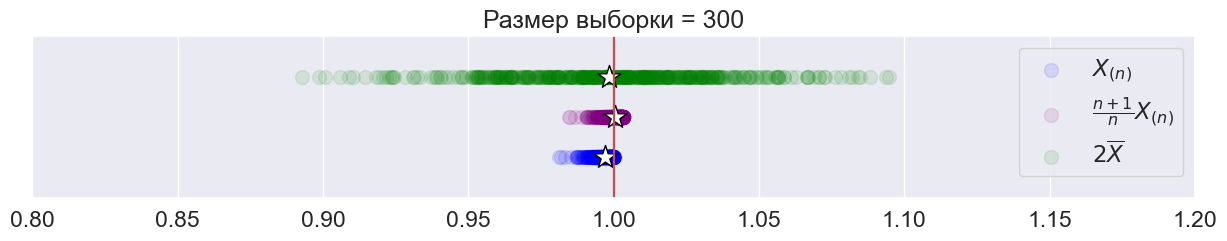

In [12]:
plt.figure(figsize=(15, 0.7*len(estimators)))
for estimator, name, color, y in estimators:
    E = estimator(X)
    plt.scatter(E, np.zeros(sample_count) + y, alpha=0.1,
                    s=100, color=color, label=name)
    plt.scatter(E.mean(), y, marker='*', s=300,
                    color='w', edgecolors='black')

    plt.vlines(1, -1, 1, color='r')
    plt.title('Размер выборки = %d' % sample_size)
    plt.yticks([])
    plt.legend()
    plt.xlim((0.8, 1.2))
    plt.ylim((-0.1, 0.1 * len(estimators)))

Напишите функцию построения таких графиков в общем виде: на вход функция может получать любые распределения (`distributions`) и любые оценки (`estimators`).

In [13]:
def est_plot(distribution, estimators, sample_size, sample_count):
    '''
    Построение графика разброса реализаций оценок и их средних значений.

    distribution -- распределение формата scipy.stats
    estimators -- список оценок и параметров для отрисовки графиков
    sample_size -- размер выборок
    sample_count -- количество генерируемых выборок
    '''
    X = distribution.rvs(size=(sample_count, sample_size))
    plt.figure(figsize=(15, 0.7*len(estimators)))
    for estimator, name, color, y in estimators:
        E = estimator(X)
        plt.scatter(E, np.zeros(sample_count) + y, alpha=0.1,
                        s=100, color=color, label=name)
        plt.scatter(E.mean(), y, marker='*', s=300,
                        color='w', edgecolors='black')

        plt.vlines(1, -1, 1, color='r')
        plt.title('Размер выборки = %d' % sample_size)
        plt.yticks([])
        plt.legend()
        plt.xlim((0.8, 1.2))
        plt.ylim((-0.1, 0.1 * len(estimators)))
        

Постройте три графика, аналогичных верхнему, для разных размеров выборок (10, 100, 500).


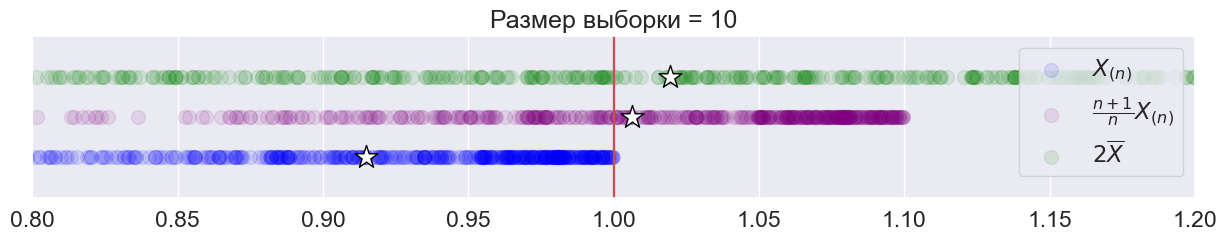

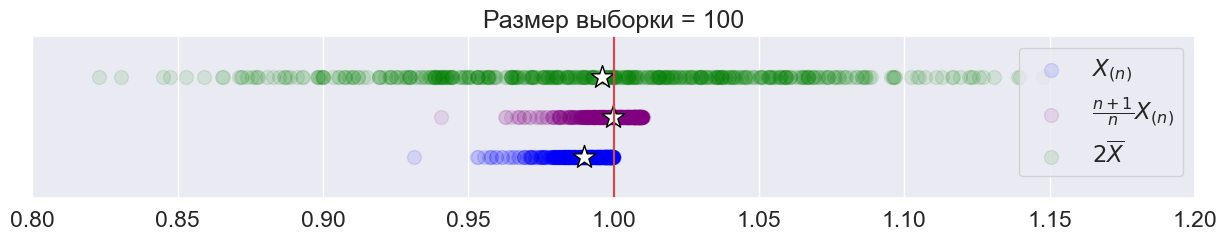

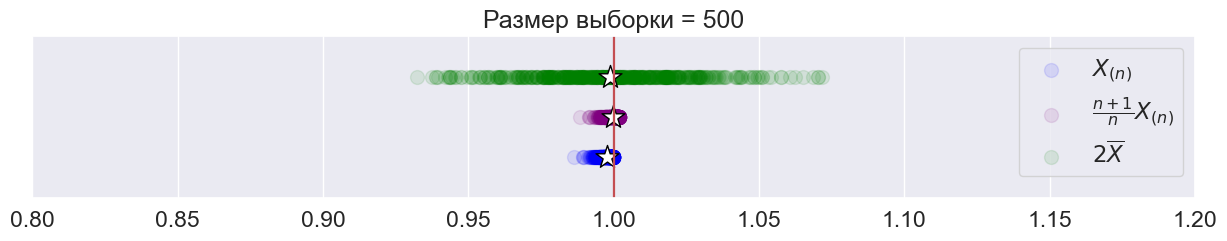

In [15]:
sample_count = 500  # количество экспериментов
sample_size_list = [10, 100, 500] # размеры выборок

for sample_size in sample_size_list:
    est_plot(sps.uniform, estimators, sample_size, sample_count)

**2.** Изучим поведение среднего оценок из первого пункта при росте размера $n$ выборки. Для вычисления зависимости нужно один раз сгенерировать выборки из п. 1.1 достаточно большого размера и посчитать оценки по префиксам, используя функции из `numpy`. Какие из оценок являются асимптотически несмещёнными (т.е. $\forall \theta \in \Theta\colon \mathsf{E}_\theta \widehat{\theta} \to \theta$ при $n\to +\infty$)?

In [81]:
#Список, содержащий только названия функций оценок
estimators2 = [
    estimate_X_n,
    estimate_X_n_corrected,
    estimate_2_mean
]

In [82]:
def mean_plot(distribution, estimators, n_grid, sample_count):
    '''
    distribution -- распределение формата scipy.stats
    estimators -- список оценок и параметров для отрисовки графиков
    n_grid -- массив значений размера выборки
    sample_count -- количество генерируемых выборок
    '''
    Est=np.zeros((len(n_grid),3)) #Массив нулей размера: Длина_Списка_размеров_выборок x Число функций оценки
    #Он нужен для записи данных оценки
    plt.figure(figsize=(15, 2*len(estimators)))
    for j in range(len(n_grid)):
        X = distribution.rvs(size=(sample_count, int(n_grid[j])))
        for i in range(3):
            E = estimators[i](X)
            Est[j][i] = E.mean() #Записываем значение средней оценки для каждой функции-оценки
    
    #Строим график и делаем подписи
    plt.scatter(n_grid,Est[:, 0], color='blue', label=r'$X_{(n)}$', s=60, alpha=0.6) 
    plt.scatter(n_grid,Est[:, 1], color ='purple', label=r'$\frac{n+1}{n}X_{(n)}$', s=60, alpha=0.6)
    plt.scatter(n_grid,Est[:, 2], color='green', label=r'$2\overline{X}$', s=60, alpha=0.6)
    plt.xlabel('Размер выборки $n$')
    plt.ylabel('Средняя оценка')
    plt.legend(loc='lower right')

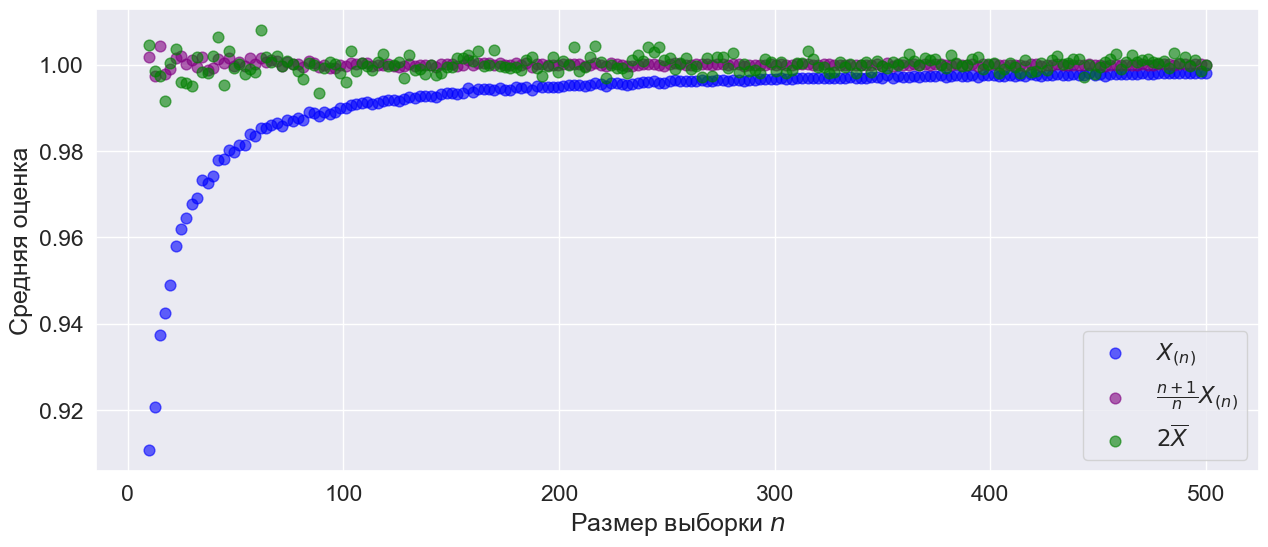

In [83]:
n_grid = np.linspace(10, 500, 200)
mean_plot(sps.uniform, estimators2, n_grid, sample_count)

**Вывод.** Несмещенность &mdash; свойство оценки в среднем быть равной параметру, который она оценивает. Иначе говоря, при бесконечном повторении эксперимента в среднем оценка будет равна истинному значению параметра.
Проведенные эксперименты подтверждают свойство несмещенности &mdash; среднее значение несмещенных оценок $\frac{n}{n-1}X_{(n)}$ и $2\overline{X}$ оказались примерно равны истинному значению параметра в отличии от смещенной оценки $X_{(n)}$. Кроме того, можно заметить, что для смещенной оценки $X_{(n)}$ смещение уменьшается с ростом размера выборки, иначе говоря, она является *асимптотически несмещенной*.

В лабораторных работах скорректированные оценки используют, т.к. число опытов часто мало и $n$ нельзя считать достаточно большим. В таком случае отличие между несмещенными оценками и асимптотически несмещенными оценками становится существенным.

### 2. Состоятельность оценок

Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $Exp(\theta)$. Как известно из теории, оценка $\widehat{\theta} = 1/\overline{X}$ является *состоятельной* и *асимтотически нормальной* оценкой параметра $\theta$ с асимптотической дисперсией $\theta^2$. В этой задаче вам необходимо визуализировать данные свойства.


Зададим параметры эксперимента


In [48]:
theta = 2  # истинное значение параметра
sample_size = 300  # размер выборок
sample_count = 500  # количество выборок
n_range = (np.arange(sample_size) + 1)  # размеры подвыборок


Сгенерируем множество выборок из распределения $Exp(\theta)$ (количество выборок - `sample_count`, размер каждой выборки - `sample_size`)

In [64]:
# генерируем множество выборок,
# параметр theta является обратным к параметру масштаба
samples = sps.expon(scale=theta).rvs(size=(sample_count, sample_size))
samples.shape

(500, 300)

Вычислим оценки в зависимости от размера выборки, усредняем по последней оси

In [65]:
estimation = np.cumsum(samples, axis=1)/np.arange(1, sample_size+1)

Визуализируем для каждой выборки все оценки в зависимости от размера выборки.

Что можно сказать о состоятельности данной оценки?

In [76]:
def est_plot(estimation, sample_count, sample_size, left=None, right=None, xlim = sample_size ):
    '''
    estimation -- массив оценок от размера выборки
    sample_count -- количество генерируемых выборок
    sample_size -- размер каждой выборки
    left, rigth -- границы доверительного интеравала, нужны будут далее
    xlim = область по x
    '''
    
    plt.figure(figsize=(15, 7))
    for i in range(sample_count):
        plt.plot(np.arange(sample_size) + 1, estimation[i], color='blue', alpha=0.05)
    if type(left) and type(right) is np.ndarray:
        
        plt.plot(np.arange(sample_size) + 1, left, color='black')
        plt.plot(np.arange(sample_size) + 1, right, color='black')
        labels = [r'$\hat{\theta}$', r'$\theta$',
                  'Границы доверительного интервала']
        handels = [Line2D([0], [0], color='blue', lw=2),
                   Line2D([0], [0], color='red', lw=2),
                   Line2D([0], [0], color='black', lw=2)]
        
    else: 
        labels = [r'$\hat{\theta}$', r'$\theta$']
        handels = [Line2D([0], [0], color='blue', lw=2),
                   Line2D([0], [0], color='red', lw=2),]
    
    plt.hlines(theta, 0 ,sample_size, color='red')
    plt.title('Поведение оценки для разных реализаций')
    plt.xlabel('Размер выборки')
    plt.ylim((0, 5))
    plt.legend(handels, labels)
    plt.xlim((0, xlim));

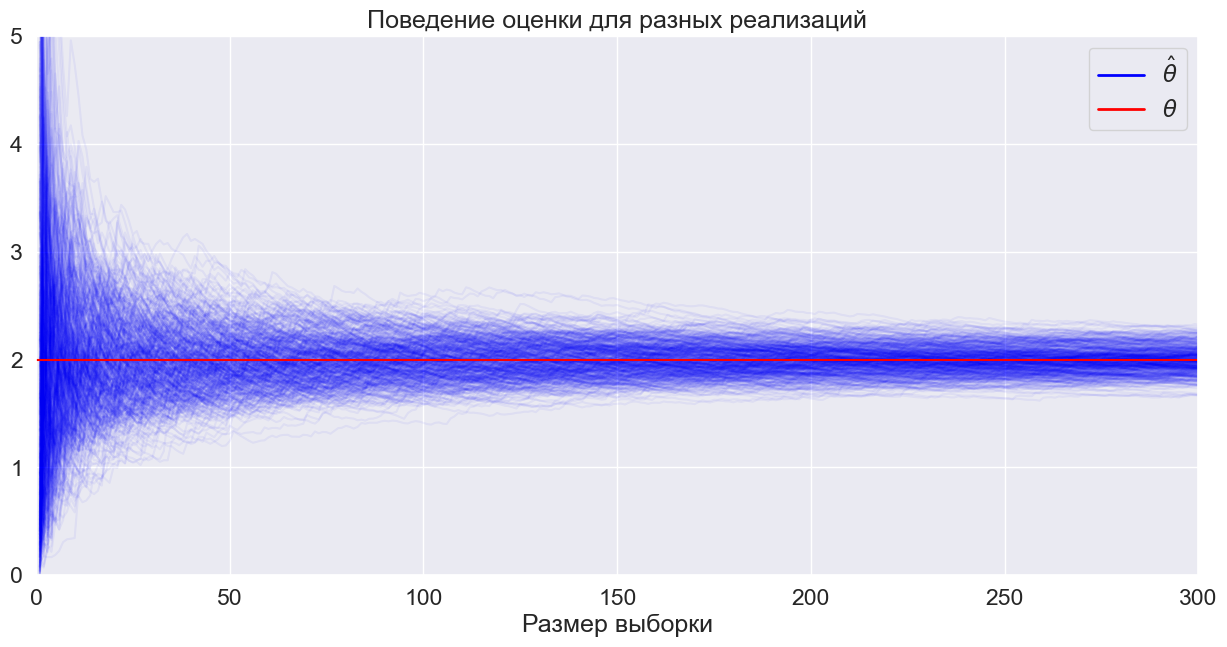

In [77]:
est_plot(estimation, sample_count, sample_size)

**Ответ:** Из полученного графика видно, что данная оценка является состоятельной, так как она сходится к оцениваемому параметру $\theta$ (по крайней мере по вероятности), также по характеру сходимости на графике она похожа на асимптотически нормальную оценку

### 3. Асимптотическая нормальность оценки

Добавим доверительный интервал для нашей оценки.

Свойство *асимптотической нормальности* говорит о том, что с вероятностью около 0.95 при больших размерах выборки значение оценки отклоняется от истинного значения параметра не более чем на $2\theta\left/\sqrt{n}\right.$. Добавте интервалы в функцию, чтобы на рисунок добавился доверительный интервал.

In [86]:
right = theta + 2*theta/np.sqrt(np.arange(sample_size)+1)
left = theta - 2*theta/np.sqrt(np.arange(sample_size)+1)

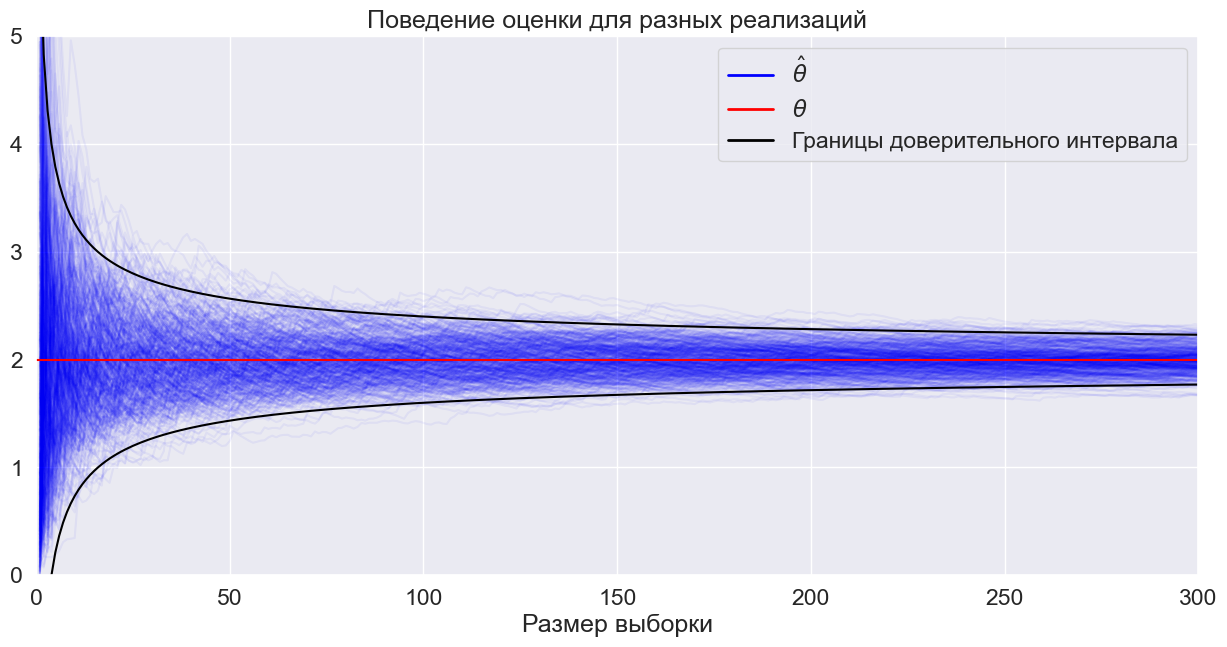

In [87]:
est_plot(estimation, sample_count, sample_size, left=left, right=right)

**Вывод:** Наша гипотеза об асимтотической нормальности данной оценки получила подтверждение на построенном выше графике. Хорошо видно, что с очень большой вероятностью $P \rightarrow 1$ значение оценки отклоняется от истинного значения параметра не более чем на $2\theta\left/\sqrt{n}\right.$

Приблизим этот график в области малых размеров выборки (до 50). Какой вывод вы можете сделать?

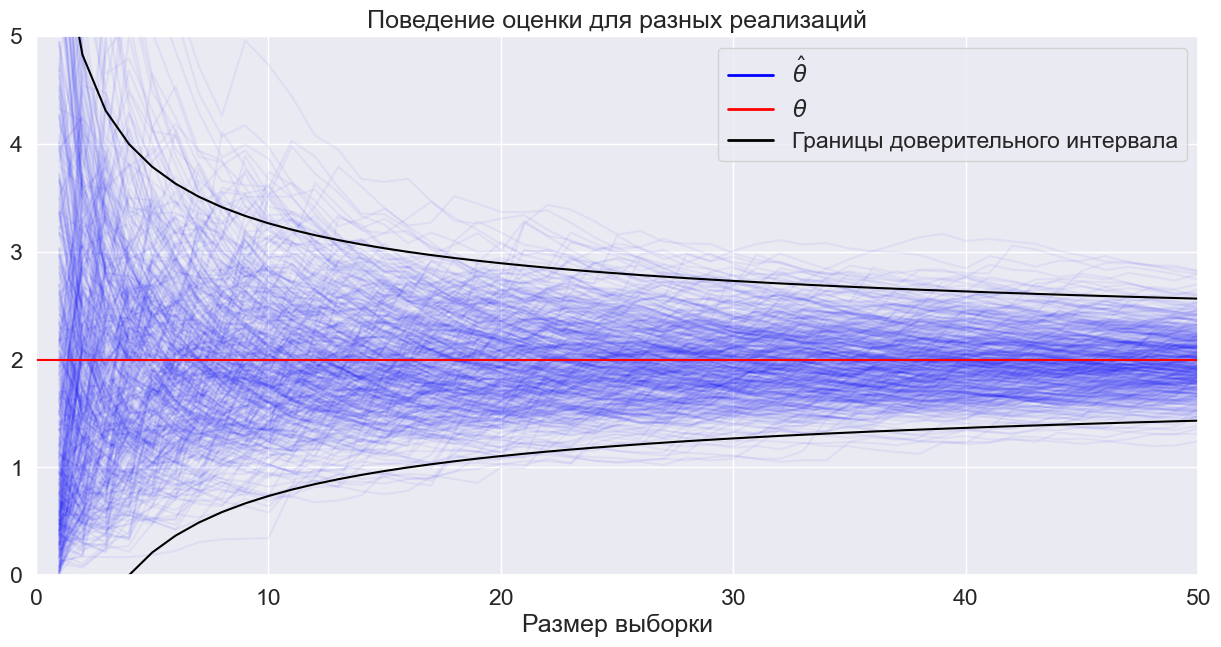

In [88]:
est_plot(estimation, sample_count, sample_size, left=left, right=right, xlim = 50)

**Вывод:** В области малых значений размеров выборок (< 50 в данном случае) картина выгядит несколько хуже. Видно, что значительная часть оценок лежит вне доверитльного интервала для асимптотичеки нормальной оценки. При этом сам доверительный интервал расширяется, что ухудшает достоверность нашей оценки. Исходя из этого можно сделать вывод о том, что свойство *асимптотической нормальности* улучшается с ростом размера выборки $n$